NLP BASED CHATBOT

-SHREYA PRASAD

In [1]:
import nltk
import string
import pandas as pd
import nlp_utils as nu
import matplotlib.pyplot as plt
# Loading necessary libraries

In [2]:
f = open("dialogs_new.txt", "r")
print(f.read())
# reading the data 

Question,Answer
What are the academic rules for attendance?	Most courses have a minimum attendance requirement, typically around 75-80%. Falling below this threshold may result in penalties or even course failure.
How many credits are required to graduate?	The number of credits required for graduation varies by program. It's advisable to check the specific requirements for your major.
Is there a minimum GPA requirement?	Yes, maintaining a minimum GPA is often a requirement for good academic standing. This requirement varies, but it's commonly around 2.0 or higher.
What is the policy on late assignments?	Late assignment policies vary by professor and course. It's crucial to familiarize yourself with the specific policies outlined in the course syllabus.
Can I drop a course after the deadline?	Dropping a course after the deadline is usually not allowed. Late withdrawals may be granted under exceptional circumstances and require approval from the academic advisor.
Are there any prerequisi

In [3]:
df=pd.read_csv('dialogs_new.txt',names=('Query','Response'),sep=('\t'))
# Reading the data dialogs.txt

In [4]:
df
# loading the data

,Query,Response
0,"Question,Answer",NaN
1,What are the academic rules for attendance?,Most courses have a minimum attendance require...
2,How many credits are required to graduate?,The number of credits required for graduation ...
3,Is there a minimum GPA requirement?,"Yes, maintaining a minimum GPA is often a requ..."
4,What is the policy on late assignments?,Late assignment policies vary by professor and...
5,Can I drop a course after the deadline?,Dropping a course after the deadline is usuall...
6,Are there any prerequisites for specific courses?,"Yes, many courses have prerequisites, and stud..."
7,How does the grading system work?,Grading systems vary but often include letter ...
8,What is the policy on academic honesty?,Colleges typically have strict policies agains...
9,Are there opportunities for extra credit?,Extra credit policies differ by instructor. So...


## Data Understanding

In [5]:
df.shape
# There are 3724 rows and 2 columns in our dataset

(12, 2)

In [6]:
df.columns
# Displaying the names of columns present in the dataset

Index(['Query', 'Response'], dtype='object')

In [7]:
df.info()
# Checking information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Query     12 non-null     object
 1   Response  11 non-null     object
dtypes: object(2)
memory usage: 320.0+ bytes


In [8]:
df.describe()
# Describe function shows us the frequency,unique and counts of all columns

,Query,Response
count,12,11
unique,12,11
top,"Question,Answer",Most courses have a minimum attendance require...
freq,1,1


In [9]:
df.nunique()
# nunique() function return number of unique elements in the object. 

Query       12
Response    11
dtype: int64

In [10]:
df.isnull().sum()
# Checking for the presence of null values in the data. As we can see there are no null values present in the data

Query       0
Response    1
dtype: int64

In [11]:
df['Query'].value_counts()
# Checking the counts of the values present in the column 'Query'

Query
Question,Answer                                      1
What are the academic rules for attendance?          1
How many credits are required to graduate?           1
Is there a minimum GPA requirement?                  1
What is the policy on late assignments?              1
Can I drop a course after the deadline?              1
Are there any prerequisites for specific courses?    1
How does the grading system work?                    1
What is the policy on academic honesty?              1
Are there opportunities for extra credit?            1
Can I retake a course to improve my grade?           1
What is the process for appealing a grade?           1
Name: count, dtype: int64

In [12]:
df['Response'].value_counts()
# Checking the counts of the values present in the column 'Response'

Response
Most courses have a minimum attendance requirement, typically around 75-80%. Falling below this threshold may result in penalties or even course failure.                                   1
The number of credits required for graduation varies by program. It's advisable to check the specific requirements for your major.                                                          1
Yes, maintaining a minimum GPA is often a requirement for good academic standing. This requirement varies, but it's commonly around 2.0 or higher.                                          1
Late assignment policies vary by professor and course. It's crucial to familiarize yourself with the specific policies outlined in the course syllabus.                                     1
Dropping a course after the deadline is usually not allowed. Late withdrawals may be granted under exceptional circumstances and require approval from the academic advisor.                1
Yes, many courses have prerequisites, and

## Data Visualization

In [13]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [14]:
Text=df['Query']

In [15]:
sid = SentimentIntensityAnalyzer()
for sentence in Text:
     print(sentence)
        
     ss = sid.polarity_scores(sentence)
     for k in ss:
         print('{0}: {1}, ' .format(k, ss[k]), end='')
     print()

Question,Answer
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
What are the academic rules for attendance?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
How many credits are required to graduate?
neg: 0.0, neu: 0.706, pos: 0.294, compound: 0.3612, 
Is there a minimum GPA requirement?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
What is the policy on late assignments?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
Can I drop a course after the deadline?
neg: 0.296, neu: 0.704, pos: 0.0, compound: -0.2732, 
Are there any prerequisites for specific courses?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
How does the grading system work?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
What is the policy on academic honesty?
neg: 0.0, neu: 0.652, pos: 0.348, compound: 0.4939, 
Are there opportunities for extra credit?
neg: 0.0, neu: 0.435, pos: 0.565, compound: 0.6369, 
Can I retake a course to improve my grade?
neg: 0.0, neu: 0.674, pos: 0.326, compound: 0.4404, 
What is the process for appeal

In [16]:
analyzer = SentimentIntensityAnalyzer()
df['rating'] = Text.apply(analyzer.polarity_scores)
df=pd.concat([df.drop(['rating'], axis=1), df['rating'].apply(pd.Series)], axis=1)
### Creating a dataframe.

In [17]:
df

,Query,Response,neg,neu,pos,compound
0,"Question,Answer",NaN,0.000,1.000,0.000,0.0000
1,What are the academic rules for attendance?,Most courses have a minimum attendance require...,0.000,1.000,0.000,0.0000
2,How many credits are required to graduate?,The number of credits required for graduation ...,0.000,0.706,0.294,0.3612
3,Is there a minimum GPA requirement?,"Yes, maintaining a minimum GPA is often a requ...",0.000,1.000,0.000,0.0000
4,What is the policy on late assignments?,Late assignment policies vary by professor and...,0.000,1.000,0.000,0.0000
5,Can I drop a course after the deadline?,Dropping a course after the deadline is usuall...,0.296,0.704,0.000,-0.2732
6,Are there any prerequisites for specific courses?,"Yes, many courses have prerequisites, and stud...",0.000,1.000,0.000,0.0000
7,How does the grading system work?,Grading systems vary but often include letter ...,0.000,1.000,0.000,0.0000
8,What is the policy on academic honesty?,Colleges typically have strict policies agains...,0.000,0.652,0.348,0.4939
9,Are there opportunities for extra credit?,Extra credit policies differ by instructor. So...,0.000,0.435,0.565,0.6369


In [18]:
from wordcloud import WordCloud
# importing word cloud

In [19]:
def wordcloud(df, label):
    
    subset=df[df[label]==1]
    text=df.Query.values
    wc= WordCloud(background_color="red",max_words=1000)

    wc.generate(" ".join(text))

    plt.figure(figsize=(20,20))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words frequented in {}".format(label), fontsize=20)
    plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)
# visualising wordcloud    

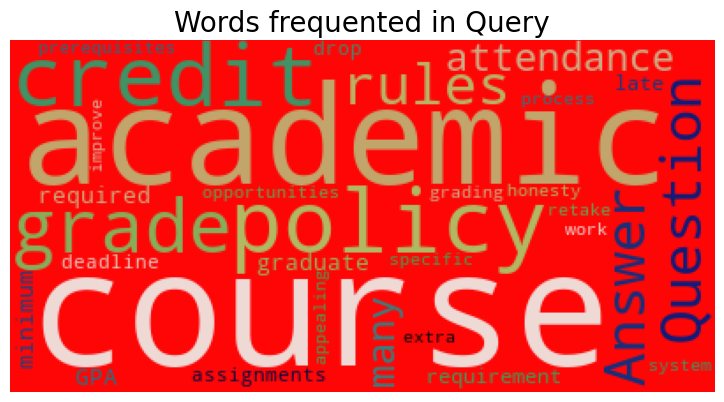

In [20]:
wordcloud(df,'Query')
# top words in the query column

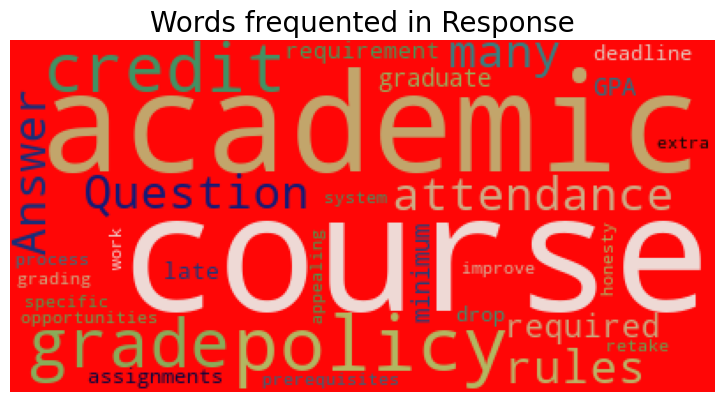

In [21]:
wordcloud(df,'Response')
# top words in the response column

## Text-Normalization

In [22]:
# Removing special characters

In [23]:
import re
# importing regular expressions

In [24]:
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
# Lower case conversion

In [25]:
remove_n = lambda x: re.sub("\n", " ", x)
# removing \n and replacing them with empty value

In [26]:
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)
# removing non ascii characters

In [27]:
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
# removing alpha numeric values

In [28]:
df['Query'] = df['Query'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)
# using map function and applying the function on query column

In [29]:
import re
import pandas as pd

# Sample DataFrame
data = {
    'Query': ['Question,Answer', 'What are the academic rules for attendance?', 'How many credits are required to graduate?', 'Is there a minimum GPA requirement?', 'What is the policy on late assignments?', 'Can I drop a course after the deadline?', 'Are there any prerequisites for specific courses?', 'How does the grading system work?', 'What is the policy on academic honesty?', 'Are there opportunities for extra credit?', 'Can I retake a course to improve my grade?', 'What is the process for appealing a grade?'],
    'Response': ['NaN', 'Most courses have a minimum attendance requirement, typically around 75-80%. Falling below this threshold may result in penalties or even course failure.', 'The number of credits required for graduation varies by program. It\'s advisable to check the specific requirements for your major.', 'Yes, maintaining a minimum GPA is often a requirement for good academic standing. This requirement varies, but it\'s commonly around 2.0 or higher.', 'Late assignment policies vary by professor and course. It\'s crucial to familiarize yourself with the specific policies outlined in the course syllabus.', 'Dropping a course after the deadline is usually not allowed. Late withdrawals may be granted under exceptional circumstances and require approval from the academic advisor.', 'Yes, many courses have prerequisites, and students are generally required to complete these before enrolling. Prerequisites are listed in the course catalog.', 'Grading systems vary but often include letter grades (A, B, C, D, F) with corresponding grade point values. It\'s essential to understand the grading scale used in each course.', 'Colleges typically have strict policies against plagiarism and cheating. Violations can result in severe consequences, including academic probation or expulsion.', 'Extra credit policies differ by instructor. Some professors may offer extra credit assignments, while others may not. It\'s recommended to check with individual instructors.', 'Most colleges allow students to retake courses to improve grades. However, policies on how the new grade affects the GPA can vary, so it\'s essential to check with the academic advisor.', 'The process for appealing a grade varies by college. Generally, students must follow specific procedures outlined by the institution, and the appeal must be based on valid grounds.']
}

df = pd.DataFrame(data)

# Functions to clean text
def alphanumeric(x):
    if isinstance(x, str):
        return re.sub('\w*\d\w*', ' ', x)
    return ''

def punc_lower(x):
    if isinstance(x, str):
        return x.lower()

def remove_n(x):
    if isinstance(x, str):
        return x.replace('\n', ' ')
    return ''

def remove_non_ascii(x):
    if isinstance(x, str):
        return ''.join(char for char in x if ord(char) < 128)
    return ''

# Applying the functions on the 'Response' column
df['Response'] = df['Response'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

# Display the cleaned DataFrame
print(df)


                                                Query  \
0                                     Question,Answer   
1         What are the academic rules for attendance?   
2          How many credits are required to graduate?   
3                 Is there a minimum GPA requirement?   
4             What is the policy on late assignments?   
5             Can I drop a course after the deadline?   
6   Are there any prerequisites for specific courses?   
7                   How does the grading system work?   
8             What is the policy on academic honesty?   
9           Are there opportunities for extra credit?   
10         Can I retake a course to improve my grade?   
11         What is the process for appealing a grade?   

                                             Response  
0                                                 nan  
1   most courses have a minimum attendance require...  
2   the number of credits required for graduation ...  
3   yes, maintaining a minimum gpa

In [30]:
df
# final cleaned dataset

,Query,Response
0,"Question,Answer",nan
1,What are the academic rules for attendance?,most courses have a minimum attendance require...
2,How many credits are required to graduate?,the number of credits required for graduation ...
3,Is there a minimum GPA requirement?,"yes, maintaining a minimum gpa is often a requ..."
4,What is the policy on late assignments?,late assignment policies vary by professor and...
5,Can I drop a course after the deadline?,dropping a course after the deadline is usuall...
6,Are there any prerequisites for specific courses?,"yes, many courses have prerequisites, and stud..."
7,How does the grading system work?,grading systems vary but often include letter ...
8,What is the policy on academic honesty?,colleges typically have strict policies agains...
9,Are there opportunities for extra credit?,extra credit policies differ by instructor. so...


In [31]:
pd.set_option('display.max_rows',3800)
# Displaying all rows in the dataset

In [32]:
df

,Query,Response
0,"Question,Answer",nan
1,What are the academic rules for attendance?,most courses have a minimum attendance require...
2,How many credits are required to graduate?,the number of credits required for graduation ...
3,Is there a minimum GPA requirement?,"yes, maintaining a minimum gpa is often a requ..."
4,What is the policy on late assignments?,late assignment policies vary by professor and...
5,Can I drop a course after the deadline?,dropping a course after the deadline is usuall...
6,Are there any prerequisites for specific courses?,"yes, many courses have prerequisites, and stud..."
7,How does the grading system work?,grading systems vary but often include letter ...
8,What is the policy on academic honesty?,colleges typically have strict policies agains...
9,Are there opportunities for extra credit?,extra credit policies differ by instructor. so...


### Important Sentence

In [33]:
sid = SentimentIntensityAnalyzer()
df['sentiment_scores'] = df['Query'].apply(lambda x: sid.polarity_scores(x))

# Extracting compound score into a separate column
df['compound'] = df['sentiment_scores'].apply(lambda x: x['compound'])

# Important Sentence
imp_sent = df.sort_values(by='compound', ascending=False)
print(imp_sent.head(5))

                                         Query  \
9    Are there opportunities for extra credit?   
8      What is the policy on academic honesty?   
10  Can I retake a course to improve my grade?   
2   How many credits are required to graduate?   
0                              Question,Answer   

                                             Response  \
9   extra credit policies differ by instructor. so...   
8   colleges typically have strict policies agains...   
10  most colleges allow students to retake courses...   
2   the number of credits required for graduation ...   
0                                                 nan   

                                     sentiment_scores  compound  
9   {'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'comp...    0.6369  
8   {'neg': 0.0, 'neu': 0.652, 'pos': 0.348, 'comp...    0.4939  
10  {'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'comp...    0.4404  
2   {'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'comp...    0.3612  
0   {'neg': 0.0, 'neu': 1.

In [34]:
imp_sent.head(5)
# printing the first 5 rows

,Query,Response,sentiment_scores,compound
9,Are there opportunities for extra credit?,extra credit policies differ by instructor. so...,"{'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'comp...",0.6369
8,What is the policy on academic honesty?,colleges typically have strict policies agains...,"{'neg': 0.0, 'neu': 0.652, 'pos': 0.348, 'comp...",0.4939
10,Can I retake a course to improve my grade?,most colleges allow students to retake courses...,"{'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'comp...",0.4404
2,How many credits are required to graduate?,the number of credits required for graduation ...,"{'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'comp...",0.3612
0,"Question,Answer",nan,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


### Top Positive Sentence

In [35]:
# Sentiment Analysis
sid = SentimentIntensityAnalyzer()
df['sentiment_scores'] = df['Query'].apply(lambda x: sid.polarity_scores(x))

# Extracting positive score into a separate column
df['pos'] = df['sentiment_scores'].apply(lambda x: x['pos'])

# Top Positive Sentence
pos_sent = df.sort_values(by='pos', ascending=False)
print(pos_sent.head(5))

                                         Query  \
9    Are there opportunities for extra credit?   
8      What is the policy on academic honesty?   
10  Can I retake a course to improve my grade?   
2   How many credits are required to graduate?   
0                              Question,Answer   

                                             Response  \
9   extra credit policies differ by instructor. so...   
8   colleges typically have strict policies agains...   
10  most colleges allow students to retake courses...   
2   the number of credits required for graduation ...   
0                                                 nan   

                                     sentiment_scores  compound    pos  
9   {'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'comp...    0.6369  0.565  
8   {'neg': 0.0, 'neu': 0.652, 'pos': 0.348, 'comp...    0.4939  0.348  
10  {'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'comp...    0.4404  0.326  
2   {'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'comp...    0.3612 

In [36]:
pos_sent.head(5)
# printing the first 5 rows

,Query,Response,sentiment_scores,compound,pos
9,Are there opportunities for extra credit?,extra credit policies differ by instructor. so...,"{'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'comp...",0.6369,0.565
8,What is the policy on academic honesty?,colleges typically have strict policies agains...,"{'neg': 0.0, 'neu': 0.652, 'pos': 0.348, 'comp...",0.4939,0.348
10,Can I retake a course to improve my grade?,most colleges allow students to retake courses...,"{'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'comp...",0.4404,0.326
2,How many credits are required to graduate?,the number of credits required for graduation ...,"{'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'comp...",0.3612,0.294
0,"Question,Answer",nan,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000


### Top Negative Sentence

In [37]:

# Sentiment Analysis
sid = SentimentIntensityAnalyzer()
df['sentiment_scores'] = df['Query'].apply(lambda x: sid.polarity_scores(x))

# Extracting negative score into a separate column
df['neg'] = df['sentiment_scores'].apply(lambda x: x['neg'])

# Top Negative Sentence
neg_sent = df.sort_values(by='neg', ascending=False)
print(neg_sent.head(5))

                                         Query  \
5      Can I drop a course after the deadline?   
0                              Question,Answer   
1  What are the academic rules for attendance?   
2   How many credits are required to graduate?   
3          Is there a minimum GPA requirement?   

                                            Response  \
5  dropping a course after the deadline is usuall...   
0                                                nan   
1  most courses have a minimum attendance require...   
2  the number of credits required for graduation ...   
3  yes, maintaining a minimum gpa is often a requ...   

                                    sentiment_scores  compound    pos    neg  
5  {'neg': 0.296, 'neu': 0.704, 'pos': 0.0, 'comp...   -0.2732  0.000  0.296  
0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  0.000  0.000  
1  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  0.000  0.000  
2  {'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'c

In [38]:
neg_sent.head(5)
# printing the first 5 rows

,Query,Response,sentiment_scores,compound,pos,neg
5,Can I drop a course after the deadline?,dropping a course after the deadline is usuall...,"{'neg': 0.296, 'neu': 0.704, 'pos': 0.0, 'comp...",-0.2732,0.000,0.296
0,"Question,Answer",nan,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000
1,What are the academic rules for attendance?,most courses have a minimum attendance require...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000
2,How many credits are required to graduate?,the number of credits required for graduation ...,"{'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'comp...",0.3612,0.294,0.000
3,Is there a minimum GPA requirement?,"yes, maintaining a minimum gpa is often a requ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000


### Top Neutral Sentence

In [39]:
# Sentiment Analysis
sid = SentimentIntensityAnalyzer()
df['sentiment_scores'] = df['Query'].apply(lambda x: sid.polarity_scores(x))

# Extracting neutral score into a separate column
df['neu'] = df['sentiment_scores'].apply(lambda x: x['neu'])

# Top Neutral Sentence
neu_sent = df.sort_values(by='neu', ascending=False)
print(neu_sent.head(5))

                                               Query  \
0                                    Question,Answer   
1        What are the academic rules for attendance?   
3                Is there a minimum GPA requirement?   
4            What is the policy on late assignments?   
6  Are there any prerequisites for specific courses?   

                                            Response  \
0                                                nan   
1  most courses have a minimum attendance require...   
3  yes, maintaining a minimum gpa is often a requ...   
4  late assignment policies vary by professor and...   
6  yes, many courses have prerequisites, and stud...   

                                    sentiment_scores  compound  pos  neg  neu  
0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...       0.0  0.0  0.0  1.0  
1  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...       0.0  0.0  0.0  1.0  
3  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...       0.0  0.0  0.0  1.0  
4  {'n

In [40]:
neu_sent.head(5)
# printing the first 5 rows

,Query,Response,sentiment_scores,compound,pos,neg,neu
0,"Question,Answer",nan,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,0.0,1.0
1,What are the academic rules for attendance?,most courses have a minimum attendance require...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,0.0,1.0
3,Is there a minimum GPA requirement?,"yes, maintaining a minimum gpa is often a requ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,0.0,1.0
4,What is the policy on late assignments?,late assignment policies vary by professor and...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,0.0,1.0
6,Are there any prerequisites for specific courses?,"yes, many courses have prerequisites, and stud...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,0.0,1.0


In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
# importing tfidf vectorizer

In [42]:
tfidf = TfidfVectorizer()
# Word Embedding - TF-IDF

In [43]:
factors = tfidf.fit_transform(df['Query']).toarray()
# changing column into array

In [44]:
#tfidf.get_feature_names()
# Displaying feature names
feature_names = tfidf.get_feature_names_out()
print(feature_names)


['academic' 'after' 'answer' 'any' 'appealing' 'are' 'assignments'
 'attendance' 'can' 'course' 'courses' 'credit' 'credits' 'deadline'
 'does' 'drop' 'extra' 'for' 'gpa' 'grade' 'grading' 'graduate' 'honesty'
 'how' 'improve' 'is' 'late' 'many' 'minimum' 'my' 'on' 'opportunities'
 'policy' 'prerequisites' 'process' 'question' 'required' 'requirement'
 'retake' 'rules' 'specific' 'system' 'the' 'there' 'to' 'what' 'work']


# Application

In [45]:
from sklearn.metrics.pairwise import cosine_distances

In [46]:
query = 'who are you ?'
def chatbot(query):
    # step:-1 clean
    query = nu.lemmatization_sentence(query)
    # step:-2 word embedding - transform
    query_vector = tfidf.transform([query]).toarray()
    # step-3: cosine similarity
    similar_score = 1 -cosine_distances(factors,query_vector)
    index = similar_score.argmax() # take max index position
    # searching or matching question
    matching_question = df.loc[index]['Query']
    response = df.loc[index]['Response']
    pos_score = df.loc[index]['pos']
    neg_score = df.loc[index]['neg']
    neu_score = df.loc[index]['neu']
    confidence = similar_score[index][0]
    chat_dict = {'match':matching_question,
                'response':response,
                'score':confidence,
                'pos':pos_score,
                'neg':neg_score,
                'neu':neu_score}
    return chat_dict

In [47]:
import nltk

try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

try:
    nltk.data.find('taggers/averaged_perceptron_tagger')
except LookupError:
    nltk.download('averaged_perceptron_tagger')


In [48]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sp125\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [49]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sp125\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

STEP-1 ENTER AND ADD QUERY

STEP-2 ENTER THEN ESCAPE

In [50]:
import random

# Function for a simple greeting
def greet():
    return random.choice(["Hello!", "Hi there!", "Greetings!", "Hey!"])

# Function for a farewell message
def farewell():
    return "Goodbye! If you have more questions, feel free to ask."

# Function to respond to basic questions
def respond_to_basic_questions(query):
    # Basic responses to common questions
    basic_responses = {
        "how are you": "I'm just a computer program, but thanks for asking!",
        "who created you": "I was created by a team of developers.",
        "what is your purpose": "I'm here to assist and answer your questions.",
        "tell me a joke": "Why don't scientists trust atoms? Because they make up everything!",
        "exit": farewell
    }

    # Check if the user input matches any basic responses
    for question, response in basic_responses.items():
        if question in query:
            if callable(response):
                return response()
            else:
                return response

    return None  # No matching basic question

# Record of previously asked questions
history = []

# Main chat loop
while True:
    query = input('USER: ').lower()

    if query == 'exit':
        print(f'BOT: {farewell()}')
        break

    # Greeting
    if random.random() < 0.1:  # 10% chance to greet randomly
        print(f'BOT: {greet()}')
        continue

    # Respond to basic questions
    basic_response = respond_to_basic_questions(query)
    if basic_response:
        print(f'BOT: {basic_response}')
        history.append(query)
        continue

    # Chatbot response
    response = chatbot(query)

    if response['score'] <= 0.2:
        print('BOT: Please rephrase your question.')
    else:
        print('=' * 80)
        print('Logs:\n Matched Question: %r\n Confidence Score: %0.2f \n Positive Score: %r \n Negative Score: %r\n Neutral Score: %r' % (
            response['match'], response['score'] * 100, response['pos'], response['neg'], response['neu']))
        print('=' * 80)
        print(f'BOT: {response["response"]}')
        history.append(query)

    # Farewell message after answering
    print(f'BOT: {farewell()}')
    print('-' * 80)

    # Displaying history
    print('Chat History:')
    for idx, prev_query in enumerate(history, 1):
        print(f'{idx}. {prev_query}')


BOT: Please rephrase your question.
BOT: Goodbye! If you have more questions, feel free to ask.
--------------------------------------------------------------------------------
Chat History:
BOT: Please rephrase your question.
BOT: Goodbye! If you have more questions, feel free to ask.
--------------------------------------------------------------------------------
Chat History:
Logs:
 Matched Question: 'What are the academic rules for attendance?'
 Confidence Score: 81.90 
 Positive Score: 0.0 
 Negative Score: 0.0
 Neutral Score: 1.0
BOT: most courses have a minimum attendance requirement, typically around  - %. falling below this threshold may result in penalties or even course failure.
BOT: Goodbye! If you have more questions, feel free to ask.
--------------------------------------------------------------------------------
Chat History:
1. what are the academic rules for attendance?
BOT: Hey!
Logs:
 Matched Question: 'Can I drop a course after the deadline?'
 Confidence Score: 100